## **EEG Spectral Analysis - Preprocessing**

In [1]:
# Import the library to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#Apply ggplot style
import matplotlib as mpl

#Import the style
mpl.style.use('ggplot')

In [3]:
#Indicate the path where the data is
filepath = '/content/drive/My Drive/Emotiv Research/Mexico/Preprocessed Data'

In [4]:
#Indicate the files per emotion group

# EEG files from exposition to set of High Valence High Arousal images
eegfiles_hvha = ['/P01/P01_HVHA.csv','/P02/P02_HVHA.csv','/P03/P03_HVHA.csv','/P04/P04_HVHA.csv','/P05/P05_HVHA.csv',
                 '/P06/P06_HVHA.csv','/P07/P07_HVHA.csv','/P08/P08_HVHA.csv','/P09/P09_HVHA.csv','/P11/P11_HVHA.csv',
                 '/P12/P12_HVHA.csv','/P13/P13_HVHA.csv','/P14/P14_HVHA.csv','/P16/P16_HVHA.csv','/P17/P17_HVHA.csv',
                 '/P18/P18_HVHA.csv','/P19/P19_HVHA.csv','/P21/P21_HVHA.csv','/P22/P22_HVHA.csv','/P23/P23_HVHA.csv',
                 '/P24/P24_HVHA.csv','/P26/P26_HVHA.csv','/P27/P27_HVHA.csv','/P28/P28_HVHA.csv','/P29/P29_HVHA.csv',
                 '/P31/P31_HVHA.csv','/P32/P32_HVHA.csv','/P33/P33_HVHA.csv','/P34/P34_HVHA.csv','/P36/P36_HVHA.csv',
                 '/P37/P37_HVHA.csv','/P38/P38_HVHA.csv','/P39/P39_HVHA.csv'
                 ]

# EEG files from exposition to set of Low Valence High Arousal images
eegfiles_lvha = ['/P01/P01_LVHA.csv','/P02/P02_LVHA.csv','/P03/P03_LVHA.csv','/P04/P04_LVHA.csv','/P05/P05_LVHA.csv',
                 '/P06/P06_LVHA.csv','/P07/P07_LVHA.csv','/P08/P08_LVHA.csv','/P09/P09_LVHA.csv','/P11/P11_LVHA.csv',
                 '/P12/P12_LVHA.csv','/P13/P13_LVHA.csv','/P14/P14_LVHA.csv','/P16/P16_LVHA.csv','/P17/P17_LVHA.csv',
                 '/P18/P18_LVHA.csv','/P19/P19_LVHA.csv','/P21/P21_LVHA.csv','/P22/P22_LVHA.csv','/P23/P23_LVHA.csv',
                 '/P24/P24_LVHA.csv','/P26/P26_LVHA.csv','/P27/P27_LVHA.csv','/P28/P28_LVHA.csv','/P29/P29_LVHA.csv',
                 '/P31/P31_LVHA.csv','/P32/P32_LVHA.csv','/P33/P33_LVHA.csv','/P34/P34_LVHA.csv','/P36/P36_LVHA.csv',
                 '/P37/P37_LVHA.csv','/P38/P38_LVHA.csv','/P39/P39_LVHA.csv'
                 ]

# EEG files from exposition to set of High Valence Low Arousal images
eegfiles_hvla = ['/P01/P01_HVLA.csv','/P02/P02_HVLA.csv','/P03/P03_HVLA.csv','/P04/P04_HVLA.csv','/P05/P05_HVLA.csv',
                 '/P06/P06_HVLA.csv','/P07/P07_HVLA.csv','/P08/P08_HVLA.csv','/P09/P09_HVLA.csv','/P11/P11_HVLA.csv',
                 '/P12/P12_HVLA.csv','/P13/P13_HVLA.csv','/P14/P14_HVLA.csv','/P16/P16_HVLA.csv','/P17/P17_HVLA.csv',
                 '/P18/P18_HVLA.csv','/P19/P19_HVLA.csv','/P21/P21_HVLA.csv','/P22/P22_HVLA.csv','/P23/P23_HVLA.csv',
                 '/P24/P24_HVLA.csv','/P26/P26_HVLA.csv','/P27/P27_HVLA.csv','/P28/P28_HVLA.csv','/P29/P29_HVLA.csv',
                 '/P31/P31_HVLA.csv','/P32/P32_HVLA.csv','/P33/P33_HVLA.csv','/P34/P34_HVLA.csv','/P36/P36_HVLA.csv',
                 '/P37/P37_HVLA.csv','/P38/P38_HVLA.csv','/P39/P39_HVLA.csv'
                 ]

# EEG files from exposition to set of Low Valence Low Arousal images
eegfiles_lvla = ['/P01/P01_LVLA.csv','/P02/P02_LVLA.csv','/P03/P03_LVLA.csv','/P04/P04_LVLA.csv','/P05/P05_LVLA.csv',
                 '/P06/P06_LVLA.csv','/P07/P07_LVLA.csv','/P08/P08_LVLA.csv','/P09/P09_LVLA.csv','/P11/P11_LVLA.csv',
                 '/P12/P12_LVLA.csv','/P13/P13_LVLA.csv','/P14/P14_LVLA.csv','/P16/P16_LVLA.csv','/P17/P17_LVLA.csv',
                 '/P18/P18_LVLA.csv','/P19/P19_LVLA.csv','/P21/P21_LVLA.csv','/P22/P22_LVLA.csv','/P23/P23_LVLA.csv',
                 '/P24/P24_LVLA.csv','/P26/P26_LVLA.csv','/P27/P27_LVLA.csv','/P28/P28_LVLA.csv','/P29/P29_LVLA.csv',
                 '/P31/P31_LVLA.csv','/P32/P32_LVLA.csv','/P33/P33_LVLA.csv','/P34/P34_LVLA.csv','/P36/P36_LVLA.csv',
                 '/P37/P37_LVLA.csv','/P38/P38_LVLA.csv','/P39/P39_LVLA.csv'
                 ]

In [5]:
# Save cleaned data per emotion combination
hvha = []
lvha = []
hvla = []
lvla = []

for subject_file in eegfiles_hvha:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of image exposition
    filtered_data = data[data['marker_label__desc'].str.contains('active_period', na=False)]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    hvha.append(cleaned_data)


for subject_file in eegfiles_lvha:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of image exposition
    filtered_data = data[data['marker_label__desc'].str.contains('active_period', na=False)]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    lvha.append(cleaned_data)


for subject_file in eegfiles_hvla:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of image exposition
    filtered_data = data[data['marker_label__desc'].str.contains('active_period', na=False)]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    hvla.append(cleaned_data)


for subject_file in eegfiles_lvla:
    # Load data
    data = pd.read_csv(filepath + subject_file)

    # Delete unnecessary metadata
    data = data.drop(['subject_id', 'record_title', 'record_id', 'session_id'], axis=1)

    # Keep only the time of image exposition
    filtered_data = data[data['marker_label__desc'].str.contains('active_period', na=False)]

    # Remove data where the lowest channel EEG quality is < 3 OR data was missing or other problem in the Fourier transform window.
    cleaned_data = filtered_data[~((filtered_data['sq_pm__desc'] < 3) | (filtered_data['data_fixed__desc'] == 1))].reset_index()

    # Save the cleaned data from each subject in an array for later analysis
    lvla.append(cleaned_data)

In [6]:
subjects = []

for subject in hvha:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_hvha = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from LVLA into a csv file
df_hvha.to_csv('hvha_spectral_data.csv', index=False)

In [7]:
subjects = []

for subject in lvha:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_lvha = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from LVLA into a csv file
df_lvha.to_csv('lvha_spectral_data.csv', index=False)

In [8]:
subjects = []

for subject in hvla:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_hvla = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from LVLA into a csv file
df_hvla.to_csv('hvla_spectral_data.csv', index=False)

In [9]:
subjects = []

for subject in lvla:

  row = []

  # Calculate mean values of delta waves present in all channels
  row.append(subject['eeg.af3_0_4Hz__feat'].mean())
  row.append(subject['eeg.af3_0_4Hz__feat'].std())

  row.append(subject['eeg.af4_0_4Hz__feat'].mean())
  row.append(subject['eeg.af4_0_4Hz__feat'].std())

  row.append(subject['eeg.t7_0_4Hz__feat'].mean())
  row.append(subject['eeg.t7_0_4Hz__feat'].std())

  row.append(subject['eeg.t8_0_4Hz__feat'].mean())
  row.append(subject['eeg.t8_0_4Hz__feat'].std())

  row.append(subject['eeg.pz_0_4Hz__feat'].mean())
  row.append(subject['eeg.pz_0_4Hz__feat'].std())


# Calculate mean values of theta waves present in all channels
  row.append(subject['eeg.af3_4_8Hz__feat'].mean())
  row.append(subject['eeg.af3_4_8Hz__feat'].std())

  row.append(subject['eeg.af4_4_8Hz__feat'].mean())
  row.append(subject['eeg.af4_4_8Hz__feat'].std())

  row.append(subject['eeg.t7_4_8Hz__feat'].mean())
  row.append(subject['eeg.t7_4_8Hz__feat'].std())

  row.append(subject['eeg.t8_4_8Hz__feat'].mean())
  row.append(subject['eeg.t8_4_8Hz__feat'].std())

  row.append(subject['eeg.pz_4_8Hz__feat'].mean())
  row.append(subject['eeg.pz_4_8Hz__feat'].std())


  # Calculate mean values of alpha waves present in all channels
  row.append(subject['eeg.af3_8_13Hz__feat'].mean())
  row.append(subject['eeg.af3_8_13Hz__feat'].std())

  row.append(subject['eeg.af4_8_13Hz__feat'].mean())
  row.append(subject['eeg.af4_8_13Hz__feat'].std())

  row.append(subject['eeg.t7_8_13Hz__feat'].mean())
  row.append(subject['eeg.t7_8_13Hz__feat'].std())

  row.append(subject['eeg.t8_8_13Hz__feat'].mean())
  row.append(subject['eeg.t8_8_13Hz__feat'].std())

  row.append(subject['eeg.pz_8_13Hz__feat'].mean())
  row.append(subject['eeg.pz_8_13Hz__feat'].std())


  # Calculate mean values of beta waves present in all channels
  row.append(subject['eeg.af3_13_30Hz__feat'].mean())
  row.append(subject['eeg.af3_13_30Hz__feat'].std())

  row.append(subject['eeg.af4_13_30Hz__feat'].mean())
  row.append(subject['eeg.af4_13_30Hz__feat'].std())

  row.append(subject['eeg.t7_13_30Hz__feat'].mean())
  row.append(subject['eeg.t7_13_30Hz__feat'].std())

  row.append(subject['eeg.t8_13_30Hz__feat'].mean())
  row.append(subject['eeg.t8_13_30Hz__feat'].std())

  row.append(subject['eeg.pz_13_30Hz__feat'].mean())
  row.append(subject['eeg.pz_13_30Hz__feat'].std())


  # Calculate mean values of gamma- waves present in all channels
  row.append(subject['eeg.af3_30_64Hz__feat'].mean())
  row.append(subject['eeg.af3_30_64Hz__feat'].std())

  row.append(subject['eeg.af4_30_64Hz__feat'].mean())
  row.append(subject['eeg.af4_30_64Hz__feat'].std())

  row.append(subject['eeg.t7_30_64Hz__feat'].mean())
  row.append(subject['eeg.t7_30_64Hz__feat'].std())

  row.append(subject['eeg.t8_30_64Hz__feat'].mean())
  row.append(subject['eeg.t8_30_64Hz__feat'].std())

  row.append(subject['eeg.pz_30_64Hz__feat'].mean())
  row.append(subject['eeg.pz_30_64Hz__feat'].std())

  subjects.append(row)

#load data into a DataFrame object:
df_lvla = pd.DataFrame(subjects,
                       columns=['mean_delta_AF3', 'std_delta_AF3', 'mean_delta_AF4', 'std_delta_AF4', 'mean_delta_T7', 'std_delta_T7', 'mean_delta_T8', 'std_delta_T8', 'mean_delta_PZ', 'std_delta_PZ',
                                'mean_theta_AF3', 'std_theta_AF3', 'mean_theta_AF4', 'std_theta_AF4', 'mean_theta_T7', 'std_theta_T7', 'mean_theta_T8', 'std_theta_T8', 'mean_theta_PZ', 'std_theta_PZ',
                                'mean_alpha_AF3', 'std_alpha_AF3', 'mean_alpha_AF4', 'std_alpha_AF4', 'mean_alpha_T7', 'std_alpha_T7', 'mean_alpha_T8', 'std_alpha_T8', 'mean_alpha_PZ', 'std_alpha_PZ',
                                'mean_beta_AF3', 'std_beta_AF3', 'mean_beta_AF4', 'std_beta_AF4', 'mean_beta_T7', 'std_beta_T7', 'mean_beta_T8', 'std_beta_T8', 'mean_beta_PZ', 'std_beta_PZ',
                                'mean_gamma_AF3', 'std_gamma_AF3', 'mean_gamma_AF4', 'std_gamma_AF4', 'mean_gamma_T7', 'std_gamma_T7', 'mean_gamma_T8', 'std_gamma_T8', 'mean_gamma_PZ', 'std_gamma_PZ'])

# Save the new data from LVLA into a csv file
df_lvla.to_csv('lvla_spectral_data.csv', index=False)

### **Statistical Analysis per Group Emotion per Channel**

In [10]:
# Basic descriptive statistics
df_hvha.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.686362,5.493549,0.775103,5.402626,0.096585,4.829073,-1.973159,4.475401,-1.207881,4.251097,...,-10.965249,1.370801,-12.163640,1.225763,-8.889230,1.294516,-9.758365,1.351575,-11.525931,1.278730
std,4.858009,1.396923,4.047655,1.633389,3.463170,1.231242,3.105430,1.242778,3.147657,0.981246,...,3.158049,0.274291,1.560128,0.161499,2.892980,0.167154,3.038388,0.305409,1.731837,0.145146
min,-7.926280,3.457149,-8.163282,1.292236,-6.572218,2.882879,-7.141984,2.332286,-7.505730,2.798526,...,-14.486630,0.954988,-15.080429,0.905772,-14.352608,0.919920,-14.368374,0.642376,-14.544837,1.020692
25%,-2.366455,4.568764,-1.542982,4.707462,-1.988777,3.988640,-3.837692,3.608572,-3.249446,3.401896,...,-13.488074,1.140865,-13.068194,1.140194,-11.320999,1.235532,-11.993770,1.175656,-12.800725,1.167729
50%,1.357182,5.333029,0.280254,5.132479,-0.101277,4.816624,-1.864842,4.212188,-0.585081,4.133811,...,-11.774093,1.367501,-11.966011,1.177760,-8.667224,1.302631,-10.078148,1.258395,-11.480348,1.286647
75%,3.671849,6.598556,4.279626,6.569834,2.405140,5.354451,0.174232,5.249756,0.571359,4.686610,...,-8.574382,1.612157,-10.935923,1.276159,-7.242505,1.376669,-7.766519,1.531273,-10.583048,1.355642
max,11.348541,7.694176,8.402971,8.118392,6.224520,6.986140,3.330789,6.951574,3.805973,6.199709,...,-2.693319,1.767788,-9.258075,1.636717,-2.429900,1.688745,-3.511033,1.981895,-6.818334,1.530782


In [11]:
# Basic descriptive statistics
df_lvha.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.081256,5.561881,-1.222496,5.679640,-1.710883,4.524381,-2.767253,4.765692,-2.448168,4.387278,...,-11.157022,1.386996,-12.074998,1.235373,-9.816403,1.301706,-10.903558,1.485808,-11.520324,1.242809
std,3.814377,1.887987,3.231424,1.717570,2.981395,1.308984,2.672120,1.288188,2.633066,1.347004,...,3.634204,0.334904,2.734263,0.125071,2.747443,0.278427,3.047135,0.269117,2.337044,0.204601
min,-7.028136,2.293679,-8.656105,3.271500,-7.232583,1.750141,-7.861054,3.053342,-6.919234,2.541427,...,-15.052727,0.899097,-14.961782,1.036373,-14.470216,0.780858,-14.091891,1.104646,-14.983580,0.944391
25%,-2.984938,3.897258,-3.293171,4.527996,-3.833170,3.825426,-4.625172,3.782747,-4.423491,3.630472,...,-13.395692,1.158899,-13.859757,1.132354,-12.523076,1.161711,-13.351968,1.308839,-13.076177,1.119312
50%,0.667988,5.687430,-1.425659,5.129170,-1.257643,4.406435,-2.326592,4.607746,-2.091802,3.771374,...,-12.269514,1.355946,-12.614441,1.208686,-9.759225,1.254166,-11.797358,1.410781,-12.291081,1.224165
75%,2.727455,7.207389,1.697912,7.314229,0.444171,5.476325,-0.312460,5.740626,-0.720239,5.009309,...,-10.314432,1.488482,-11.094166,1.351695,-7.526500,1.477149,-9.085315,1.623979,-9.906701,1.317321
max,5.661787,8.628671,3.376179,8.675667,2.983507,7.224209,0.827149,6.967316,2.034256,7.427209,...,-2.334217,2.105052,-2.232047,1.452047,-5.638412,2.010467,-4.217749,2.066894,-6.584275,1.844484


In [12]:
# Basic descriptive statistics
df_hvla.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.822902,6.268076,0.920154,5.750663,-0.024676,4.751552,-1.412186,5.051218,-0.614101,4.799749,...,-10.914125,1.436952,-11.612602,1.226271,-8.873843,1.325809,-10.124116,1.443816,-10.839009,1.318534
std,3.595907,1.302872,3.259419,1.505097,2.641966,0.963196,2.528673,1.069152,2.806154,1.229578,...,2.805393,0.418672,2.863983,0.200515,3.344883,0.340668,3.140747,0.315484,2.640034,0.211263
min,-3.451881,3.990193,-3.378349,3.072131,-6.193971,2.753410,-4.907980,3.373838,-5.913256,3.189868,...,-13.935695,1.002353,-14.693408,0.772303,-13.407982,0.945968,-14.689138,1.096192,-13.529759,0.947713
25%,-1.241421,5.231659,-1.505498,4.734329,-0.312360,4.316624,-3.951369,4.335027,-2.435621,3.481131,...,-12.717545,1.197355,-13.189039,1.090363,-12.167661,1.090155,-11.988088,1.241643,-12.906447,1.194185
50%,2.053308,6.481014,0.591886,5.372321,0.099226,4.650411,-1.230764,4.705794,-0.858208,4.760024,...,-11.279079,1.270338,-11.934875,1.252237,-9.418505,1.287074,-11.261590,1.326575,-11.568130,1.292309
75%,3.377624,7.356564,2.883771,6.614971,1.206752,5.297248,0.405266,5.941838,1.546510,5.602507,...,-10.341178,1.647022,-11.336625,1.361426,-5.749037,1.357266,-8.356065,1.517569,-9.716720,1.435667
max,11.042455,8.584856,8.086114,8.717022,5.999210,6.680641,3.545570,7.576137,3.887477,6.940540,...,-2.830952,2.630757,-1.824123,1.510498,-2.271520,2.292172,-2.976835,2.300147,-5.305089,1.831724


In [13]:
# Basic descriptive statistics
df_lvla.describe()

,mean_delta_AF3,std_delta_AF3,mean_delta_AF4,std_delta_AF4,mean_delta_T7,std_delta_T7,mean_delta_T8,std_delta_T8,mean_delta_PZ,std_delta_PZ,...,mean_gamma_AF3,std_gamma_AF3,mean_gamma_AF4,std_gamma_AF4,mean_gamma_T7,std_gamma_T7,mean_gamma_T8,std_gamma_T8,mean_gamma_PZ,std_gamma_PZ
count,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000,...,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000,21.000000,20.000000
mean,1.331622,5.962303,0.252550,5.725854,0.371707,4.781475,-1.631840,4.893574,-0.403541,4.719167,...,-11.184594,1.482794,-11.714703,1.361356,-8.935696,1.363209,-9.819439,1.512719,-10.956963,1.272649
std,4.845636,1.451416,4.539041,1.671188,4.237855,1.074899,3.650730,1.522722,4.153875,1.310565,...,2.889153,0.373154,2.781619,0.354622,2.906303,0.345819,2.777235,0.551337,2.224963,0.277988
min,-7.104556,3.006135,-8.681125,1.936441,-5.990487,2.980952,-7.652491,1.436098,-9.320676,2.852985,...,-13.855949,0.832874,-14.597996,0.842630,-13.404431,0.906023,-13.382567,0.940218,-13.502124,0.910470
25%,-2.071446,5.266876,-2.772026,4.941698,-3.471845,4.253121,-4.425159,4.229718,-2.992776,3.764031,...,-13.284135,1.245225,-13.335039,1.209618,-10.972621,1.146336,-12.538860,1.243596,-12.622202,1.088654
50%,1.649334,5.852653,1.141399,5.712485,1.845802,4.747933,-1.424521,4.662772,0.070471,4.373307,...,-12.382455,1.418156,-12.161126,1.304812,-9.633714,1.266813,-9.722363,1.336991,-11.643214,1.187764
75%,4.358887,6.766334,2.780446,6.528787,2.596441,5.213527,1.249088,5.315600,1.427658,5.681891,...,-10.636229,1.644175,-11.227687,1.391257,-6.402247,1.515414,-7.591712,1.613833,-10.257241,1.397098
max,11.742664,9.330629,7.377782,9.349079,8.645058,7.214044,5.913539,7.994514,9.389122,7.734155,...,-2.600208,2.331621,-1.686895,2.439052,-3.433326,2.525380,-4.119185,3.426395,-5.856770,1.953463


### **General Spectral Power Analysis**

In [14]:
subjects = []

for subject in hvha:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_hvha_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from HVLA into a csv file
df_hvha_overall.to_csv('hvha_spectral_data_overall.csv', index=False)

In [15]:
subjects = []

for subject in lvha:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_lvha_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from HVLA into a csv file
df_lvha_overall.to_csv('lvha_spectral_data_overall.csv', index=False)

In [16]:
subjects = []

for subject in hvla:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_hvla_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from HVLA into a csv file
df_hvla_overall.to_csv('hvla_spectral_data_overall.csv', index=False)

In [17]:
subjects = []

for subject in lvla:

  row = []

  # Calculate overall delta activity - mean
  delta_cols = [col for col in subject.columns if "0_4Hz" in col]
  delta_avg = subject[delta_cols].mean(axis=1)
  row.append(delta_avg.mean())
  row.append(delta_avg.std())

  # Calculate overall theta activity - mean
  theta_cols = [col for col in subject.columns if "4_8Hz" in col]
  theta_avg = subject[theta_cols].mean(axis=1)
  row.append(theta_avg.mean())
  row.append(theta_avg.std())

  # Calculate overall alpha activity - mean
  alpha_cols = [col for col in subject.columns if "8_13Hz" in col]
  alpha_avg = subject[alpha_cols].mean(axis=1)
  row.append(alpha_avg.mean())
  row.append(alpha_avg.std())

  # Calculate overall beta activity - mean
  beta_cols = [col for col in subject.columns if "13_30Hz" in col]
  beta_avg = subject[beta_cols].mean(axis=1)
  row.append(beta_avg.mean())
  row.append(beta_avg.std())

  # Calculate overall gamma activity - mean
  gamma_cols = [col for col in subject.columns if "30_64Hz" in col]
  gamma_avg = subject[gamma_cols].mean(axis=1)
  row.append(gamma_avg.mean())
  row.append(gamma_avg.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_delta', 'std_delta',
    'mean_theta', 'std_theta',
    'mean_alpha', 'std_alpha',
    'mean_beta', 'std_beta',
    'mean_gamma', 'std_gamma'
]

# Load data into a DataFrame object:
df_lvla_overall = pd.DataFrame(subjects, columns = columns)

# Save the new data from HVLA into a csv file
df_lvla_overall.to_csv('lvla_spectral_data_overall.csv', index=False)

In [18]:
df_hvha_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']]

,mean_delta,mean_theta,mean_alpha,mean_beta,mean_gamma
0,2.984592,5.589025,1.353257,-3.569106,-9.534669
1,3.970804,6.168761,-0.030027,-3.487654,-9.540950
2,-1.371116,2.303336,-1.766325,-4.319744,-9.429270
3,NaN,NaN,NaN,NaN,NaN
4,-1.800363,2.329493,-1.848436,-4.248322,-9.330639
5,1.463208,3.639155,-0.580520,-4.927822,-10.210754
6,NaN,NaN,NaN,NaN,NaN
7,0.990983,4.706314,1.261003,-5.583640,-12.227502
8,NaN,NaN,NaN,NaN,NaN
9,-0.283928,2.963395,0.347725,-5.053452,-11.810247


<ipython-input-19-fa9857859835>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_hvha_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),


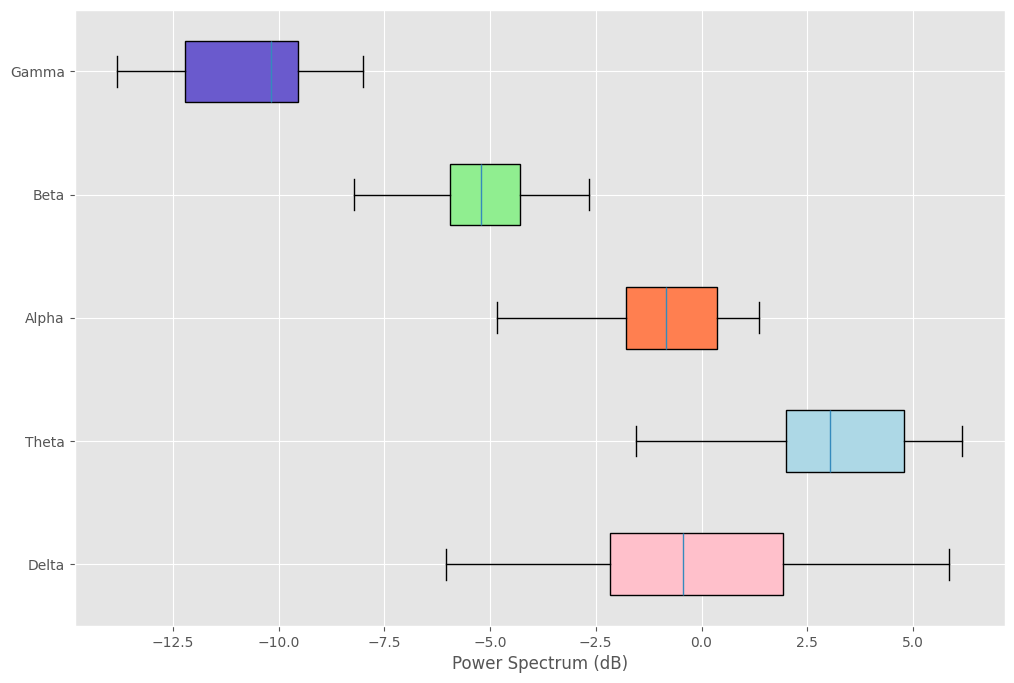

In [19]:
# 4. Plot the Box Plot for all bands for HVHA
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_hvha_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),
                     patch_artist=True, vert=False, labels=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])

colors = ['pink','lightblue', 'coral', 'lightgreen', 'slateblue']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-20-1600a3d3d294>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_lvha_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),


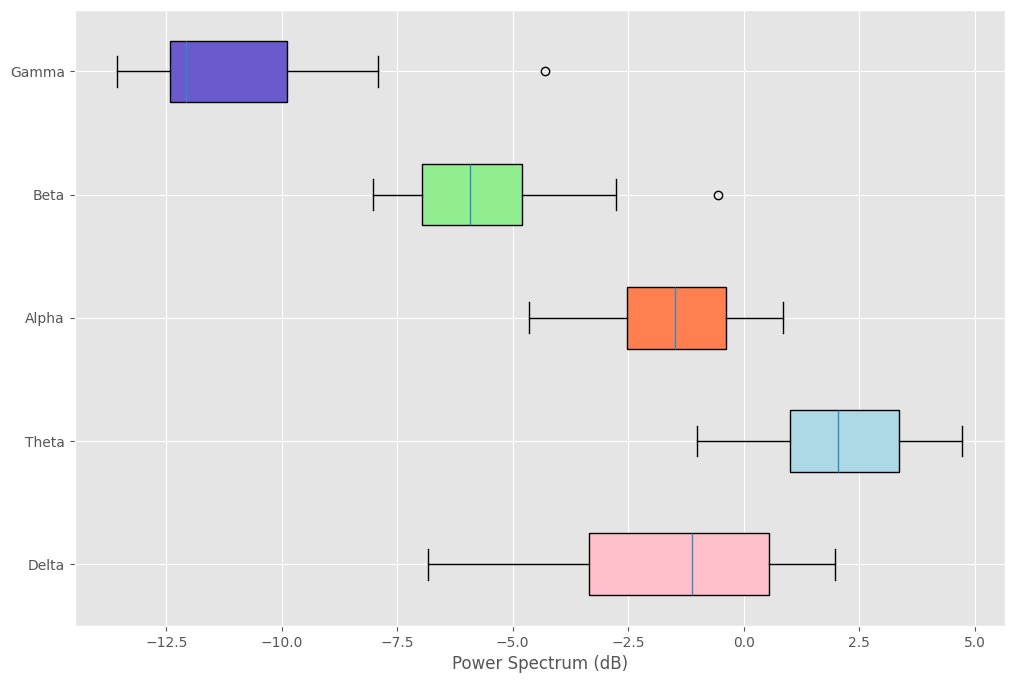

In [20]:
# 4. Plot the Box Plot for all bands for LVHA
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_lvha_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),
                     patch_artist=True, vert=False, labels=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])

colors = ['pink','lightblue', 'coral', 'lightgreen', 'slateblue']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-21-c20a7cf65641>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_hvla_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),


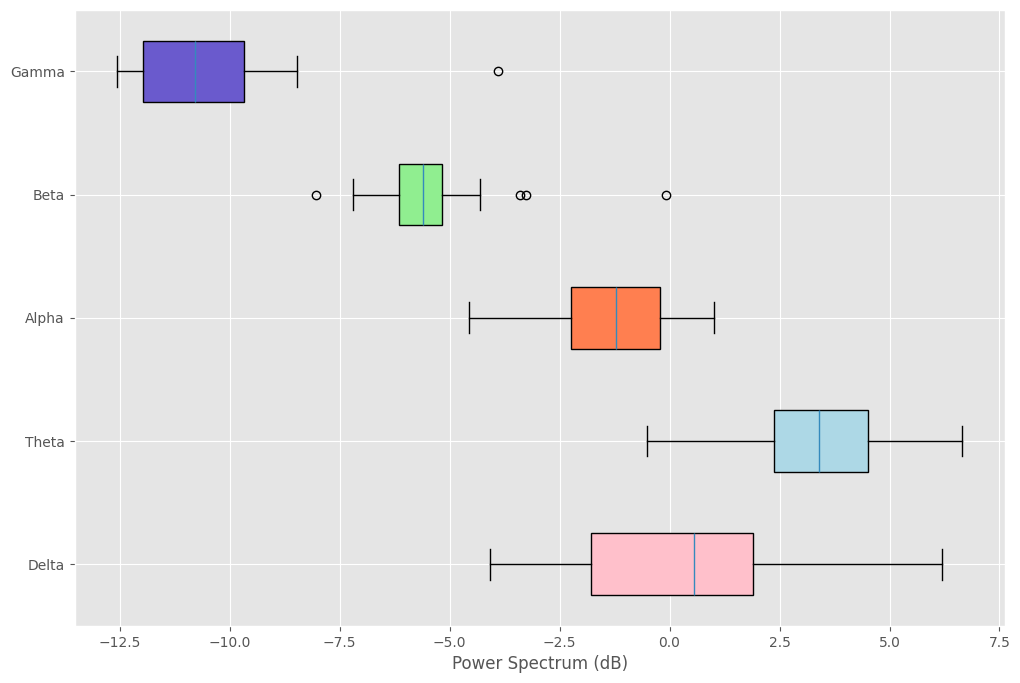

In [21]:
# 4. Plot the Box Plot for all bands for HVLA
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_hvla_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),
                     patch_artist=True, vert=False, labels=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])

colors = ['pink','lightblue', 'coral', 'lightgreen', 'slateblue']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

<ipython-input-22-2f56daa4e70d>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_lvla_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),


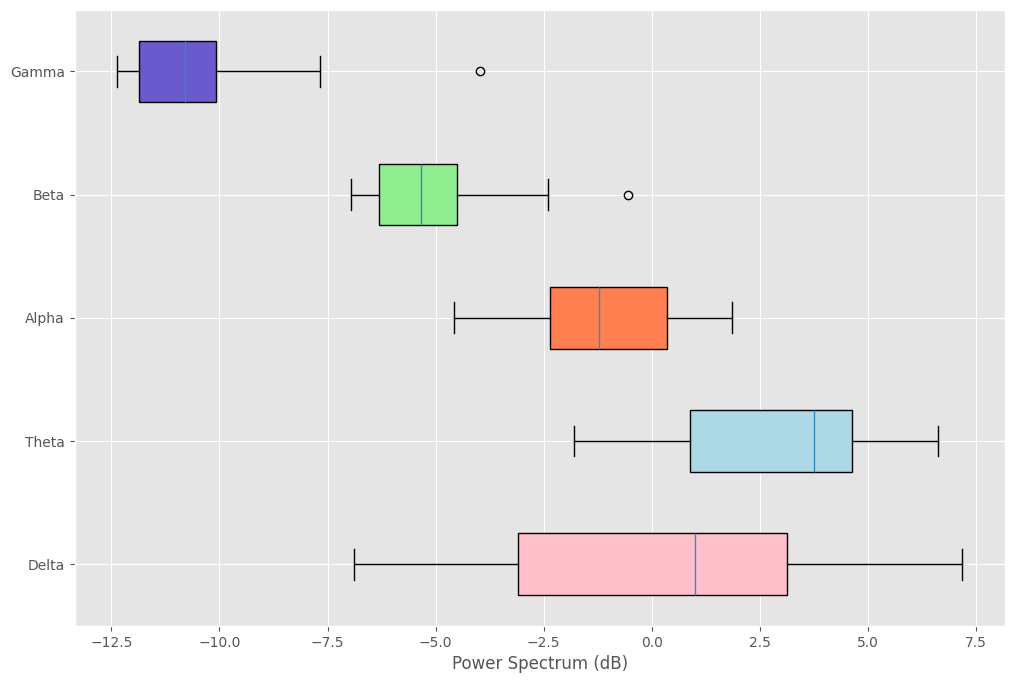

In [22]:
# 4. Plot the Box Plot for all bands for LVLA
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_lvla_overall[['mean_delta', 'mean_theta', 'mean_alpha', 'mean_beta', 'mean_gamma']].dropna(),
                     patch_artist=True, vert=False, labels=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])

colors = ['pink','lightblue', 'coral', 'lightgreen', 'slateblue']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Power Spectrum (dB)')

plt.show()

## **Valence and Arousal from EEG**

In [23]:
# Create scaler object for normalization
scaler = MinMaxScaler()

In [24]:
subjects = []

for subject in hvha:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_hvha_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_hvha_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0      -0.817516     2.706037      0.065048     6.967198
1       0.421351     1.494406     -7.712751    82.888543
2       1.675851     2.500694      2.347043    16.515057
3            NaN          NaN           NaN          NaN
4       3.351382     2.086645     -0.435696    45.702670
5       0.183579     2.373795      0.091454    24.890640
6            NaN          NaN           NaN          NaN
7      -1.004260     1.865781     -4.251530    23.939142
8            NaN          NaN           NaN          NaN
9      -0.331411     2.179908     -2.623203    33.801280
10           NaN          NaN           NaN          NaN
11      4.186831     2.837335      3.614319     2.202851
12           NaN          NaN           NaN          NaN
13           NaN          NaN           NaN          NaN
14     -1.928299     2.671975     -6.683455    72.262838
15     -0.185268     2.690859      2.289448    37.590060
16      0.078429     3.446065  

In [25]:
# Transform the results to a [0-1] scale
normalized_hvha = pd.DataFrame(scaler.fit_transform(df_hvha_valece_arousal), columns=df_hvha_valece_arousal.columns)

print(normalized_hvha)

    mean_valence  std_valence  mean_arousal  std_arousal
0       0.181645     0.620821      0.497609     0.045043
1       0.384236     0.000000      0.000000     0.762821
2       0.589382     0.515607      0.643606     0.135311
3            NaN          NaN           NaN          NaN
4       0.863380     0.303454      0.465572     0.411257
5       0.345353     0.450585      0.499298     0.214496
6            NaN          NaN           NaN          NaN
7       0.151107     0.190287      0.221442     0.205500
8            NaN          NaN           NaN          NaN
9       0.261137     0.351241      0.325620     0.298739
10           NaN          NaN           NaN          NaN
11      1.000000     0.688096      0.724684     0.000000
12           NaN          NaN           NaN          NaN
13           NaN          NaN           NaN          NaN
14      0.000000     0.603368      0.065852     0.662363
15      0.285036     0.613044      0.639922     0.334559
16      0.328158     1.000000  

In [26]:
subjects = []

for subject in lvha:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_lvha_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_lvha_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0            NaN          NaN           NaN          NaN
1       0.253901     2.056749      1.282786     9.672927
2            NaN          NaN           NaN          NaN
3            NaN          NaN           NaN          NaN
4       3.122636     2.013051      5.573136    25.720183
5       0.420196     1.989003    -71.277562   854.284163
6            NaN          NaN           NaN          NaN
7      -1.294164     1.848807      0.643128    20.167092
8            NaN          NaN           NaN          NaN
9      -0.586159     2.226508      1.142495    13.883148
10           NaN          NaN           NaN          NaN
11     -0.546760     2.499319     -0.745696    20.523689
12           NaN          NaN           NaN          NaN
13     -0.429175     2.019888      1.051235     7.398587
14     -1.335165     2.517534     -3.024699    36.233714
15           NaN          NaN           NaN          NaN
16     -0.523560     3.299421  

In [27]:
# Transform the results to a [0-1] scale
normalized_lvha = pd.DataFrame(scaler.fit_transform(df_lvha_valece_arousal), columns=df_lvha_valece_arousal.columns)

print(normalized_lvha)

    mean_valence  std_valence  mean_arousal  std_arousal
0            NaN          NaN           NaN          NaN
1       0.430892     0.373783      0.944173     0.010696
2            NaN          NaN           NaN          NaN
3            NaN          NaN           NaN          NaN
4       0.989694     0.356558      1.000000     0.029493
5       0.463285     0.347079      0.000000     1.000000
6            NaN          NaN           NaN          NaN
7       0.129344     0.291816      0.935850     0.022988
8            NaN          NaN           NaN          NaN
9       0.267257     0.440698      0.942347     0.015628
10           NaN          NaN           NaN          NaN
11      0.274931     0.548234      0.917778     0.023406
12           NaN          NaN           NaN          NaN
13      0.297836     0.359253      0.941160     0.008032
14      0.121358     0.555414      0.888123     0.041807
15           NaN          NaN           NaN          NaN
16      0.279451     0.863616  

In [28]:
subjects = []

for subject in hvla:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_hvla_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_hvla_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0       4.874367     3.592579     -4.315341    41.147721
1       0.477679     1.685891     32.830147   456.549209
2            NaN          NaN           NaN          NaN
3      -0.570345     2.158969      3.707253     8.103615
4       3.006904     2.317479     -3.575360    42.335862
5       0.685740     2.343649     12.310561   159.228981
6            NaN          NaN           NaN          NaN
7      -1.256565     2.044471     10.222596    86.803520
8            NaN          NaN           NaN          NaN
9      -0.581808     1.911551     -4.187924    38.381368
10           NaN          NaN           NaN          NaN
11     -0.783211     2.676343      3.643141    38.133905
12           NaN          NaN           NaN          NaN
13      0.093150     2.308274     -0.271894     9.257078
14     -1.920144     2.993064     -0.628761     5.278918
15           NaN          NaN           NaN          NaN
16           NaN          NaN  

In [29]:
# Transform the results to a [0-1] scale
normalized_hvla = pd.DataFrame(scaler.fit_transform(df_hvla_valece_arousal), columns=df_hvla_valece_arousal.columns)

print(normalized_hvla)

    mean_valence  std_valence  mean_arousal  std_arousal
0       1.000000     1.000000      0.293733     0.079484
1       0.352906     0.000000      1.000000     1.000000
2            NaN          NaN           NaN          NaN
3       0.198660     0.248115      0.446271     0.006259
4       0.725151     0.331249      0.307803     0.082117
5       0.383528     0.344974      0.609850     0.341148
6            NaN          NaN           NaN          NaN
7       0.097664     0.188064      0.570150     0.180656
8            NaN          NaN           NaN          NaN
9       0.196973     0.118352      0.296156     0.073354
10           NaN          NaN           NaN          NaN
11      0.167331     0.519462      0.445052     0.072806
12           NaN          NaN           NaN          NaN
13      0.296312     0.326421      0.370613     0.008815
14      0.000000     0.685572      0.363828     0.000000
15           NaN          NaN           NaN          NaN
16           NaN          NaN  

In [30]:
subjects = []

for subject in lvla:

  row = []

  # Calculate mean valence = alpha AF4 - alpha AF3 and std dev
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).mean())
  row.append((subject['eeg.af4_8_13Hz__feat'] - subject['eeg.af3_8_13Hz__feat']).std())

  # Calculate mean arousal = (beta AF4 + beta AF3) / (alpha AF4 + alpha AF3) and std dev
  aro = (subject['eeg.af4_13_30Hz__feat'] + subject['eeg.af3_13_30Hz__feat']) / (subject['eeg.af4_8_13Hz__feat'] + subject['eeg.af3_8_13Hz__feat'])
  row.append(aro.mean())
  row.append(aro.std())

  subjects.append(row)

# Define column names
columns = [
    'mean_valence', 'std_valence',
    'mean_arousal', 'std_arousal',
]

# Load data into a DataFrame object:
df_lvla_valece_arousal = pd.DataFrame(subjects, columns = columns)

print(df_lvla_valece_arousal)


    mean_valence  std_valence  mean_arousal  std_arousal
0       3.591092     3.809938     -1.097722    13.960260
1       0.339098     1.796428     -3.413715    57.242735
2            NaN          NaN           NaN          NaN
3       0.210321     2.626643      1.899265     5.348478
4       2.975486     2.115823     -6.840085    72.331272
5      -0.184806     2.025813      1.972579    28.358204
6            NaN          NaN           NaN          NaN
7      -0.832659     2.008817      1.837706    32.173256
8            NaN          NaN           NaN          NaN
9      -0.134049     2.443882      1.681527     7.859019
10           NaN          NaN           NaN          NaN
11      0.338987     2.644940     11.802924    77.990839
12           NaN          NaN           NaN          NaN
13     -0.063642     2.268125     -0.035356    10.490847
14     -1.317264     3.467587     -4.095584    61.177716
15     -1.487581     2.782359     -1.929821    58.938172
16           NaN          NaN  

In [31]:
# Transform the results to a [0-1] scale
normalized_lvla = pd.DataFrame(scaler.fit_transform(df_lvla_valece_arousal), columns=df_lvla_valece_arousal.columns)

print(normalized_lvla)

    mean_valence  std_valence  mean_arousal  std_arousal
0       1.000000     0.804592      0.308017     0.171088
1       0.393529     0.000000      0.183788     0.731404
2            NaN          NaN           NaN          NaN
3       0.369513     0.331751      0.468774     0.059604
4       0.885194     0.127629      0.000000     0.926734
5       0.295825     0.091661      0.472706     0.357477
6            NaN          NaN           NaN          NaN
7       0.175006     0.084870      0.465472     0.406865
8            NaN          NaN           NaN          NaN
9       0.305291     0.258720      0.457094     0.092104
10           NaN          NaN           NaN          NaN
11      0.393509     0.339063      1.000000     1.000000
12           NaN          NaN           NaN          NaN
13      0.318422     0.188489      0.365002     0.126174
14      0.084631     0.667790      0.147213     0.782345
15      0.052868     0.393975      0.263384     0.753352
16           NaN          NaN  

In [32]:
# Import file where manekin results are
file_results = '/content/drive/My Drive/Emotiv Research/Mexico/Analysis/test_results.xlsx'
df_manekins = pd.read_excel(file_results)
df_manekins = df_manekins[['Mk_hh_valence','Mk_hh_arousal','Mk_lh_valence','Mk_lh_arousal','Mk_hl_valence','Mk_hl_arousal','Mk_ll_valence','Mk_ll_arousal']]
df_manekins = df_manekins.iloc[:-2]
df_manekins

,Mk_hh_valence,Mk_hh_arousal,Mk_lh_valence,Mk_lh_arousal,Mk_hl_valence,Mk_hl_arousal,Mk_ll_valence,Mk_ll_arousal
0,4,1,2,4,3,1,5,1
1,4,3,2,4,4,1,3,2
2,5,4,1,4,5,2,2,3
3,4,4,2,2,4,2,3,3
4,4,2,2,5,4,4,3,3
5,5,4,2,4,5,1,3,2
6,5,2,2,4,5,1,2,3
7,5,3,1,5,5,3,2,3
8,4,3,2,4,4,3,2,3
9,4,2,2,3,5,1,3,2


In [33]:
# Transform the results to a [0-1] scale
normalized_mk = pd.DataFrame(scaler.fit_transform(df_manekins), columns=df_manekins.columns)

print(normalized_mk)

    Mk_hh_valence  Mk_hh_arousal  Mk_lh_valence  Mk_lh_arousal  Mk_hl_valence  \
0             0.5           0.00            0.5       0.666667            0.0   
1             0.5           0.50            0.5       0.666667            0.5   
2             1.0           0.75            0.0       0.666667            1.0   
3             0.5           0.75            0.5       0.000000            0.5   
4             0.5           0.25            0.5       1.000000            0.5   
5             1.0           0.75            0.5       0.666667            1.0   
6             1.0           0.25            0.5       0.666667            1.0   
7             1.0           0.50            0.0       1.000000            1.0   
8             0.5           0.50            0.5       0.666667            0.5   
9             0.5           0.25            0.5       0.333333            1.0   
10            0.5           0.75            0.0       0.666667            1.0   
11            1.0           

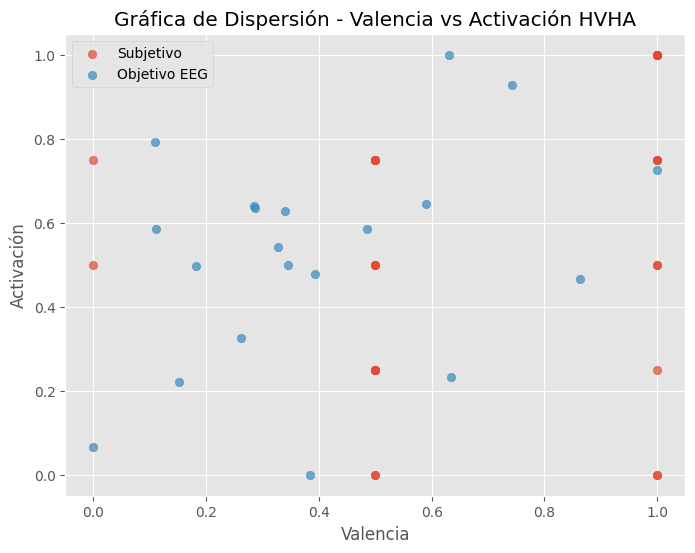

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_hh_valence'], normalized_mk['Mk_hh_arousal'], alpha=0.7, label = 'Subjetivo')
plt.scatter(normalized_hvha['mean_valence'], normalized_hvha['mean_arousal'], alpha=0.7, label = 'Objetivo EEG')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Gráfica de Dispersión - Valencia vs Activación HVHA')
plt.legend()
plt.grid(True)
plt.show()

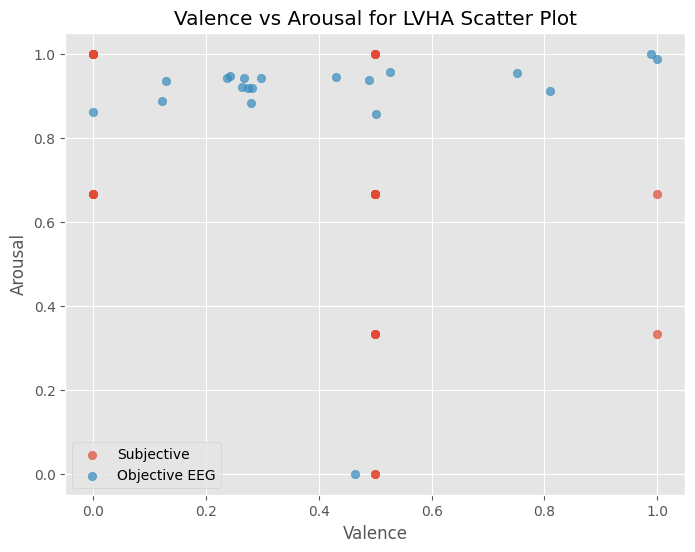

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_lh_valence'], normalized_mk['Mk_lh_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_lvha['mean_valence'], normalized_lvha['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for LVHA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

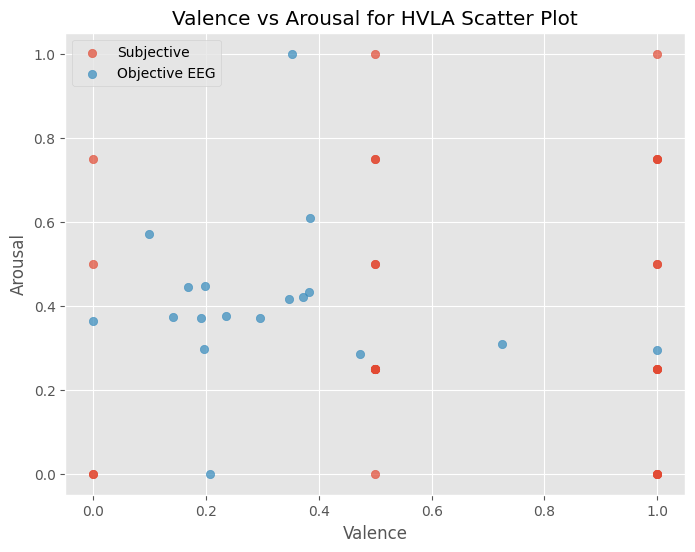

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_hl_valence'], normalized_mk['Mk_hl_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_hvla['mean_valence'], normalized_hvla['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for HVLA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

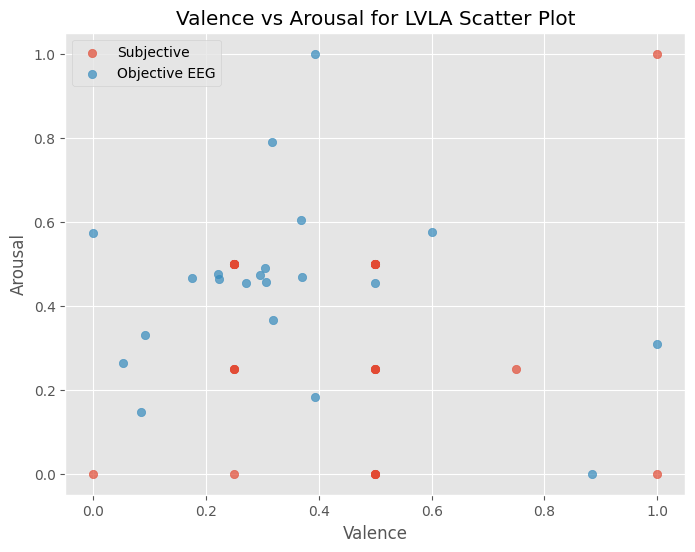

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(normalized_mk['Mk_ll_valence'], normalized_mk['Mk_ll_arousal'], alpha=0.7, label = 'Subjective')
plt.scatter(normalized_lvla['mean_valence'], normalized_lvla['mean_arousal'], alpha=0.7, label = 'Objective EEG')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence vs Arousal for LVLA Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Transform the results to a [0-1] scale, considering the original likert scale 1-5 limits
normalized2_mk = (df_manekins - 1) / (5 - 1)
print(normalized2_mk)

    Mk_hh_valence  Mk_hh_arousal  Mk_lh_valence  Mk_lh_arousal  Mk_hl_valence  \
0            0.75           0.00           0.25           0.75           0.50   
1            0.75           0.50           0.25           0.75           0.75   
2            1.00           0.75           0.00           0.75           1.00   
3            0.75           0.75           0.25           0.25           0.75   
4            0.75           0.25           0.25           1.00           0.75   
5            1.00           0.75           0.25           0.75           1.00   
6            1.00           0.25           0.25           0.75           1.00   
7            1.00           0.50           0.00           1.00           1.00   
8            0.75           0.50           0.25           0.75           0.75   
9            0.75           0.25           0.25           0.50           1.00   
10           0.75           0.75           0.00           0.75           1.00   
11           1.00           

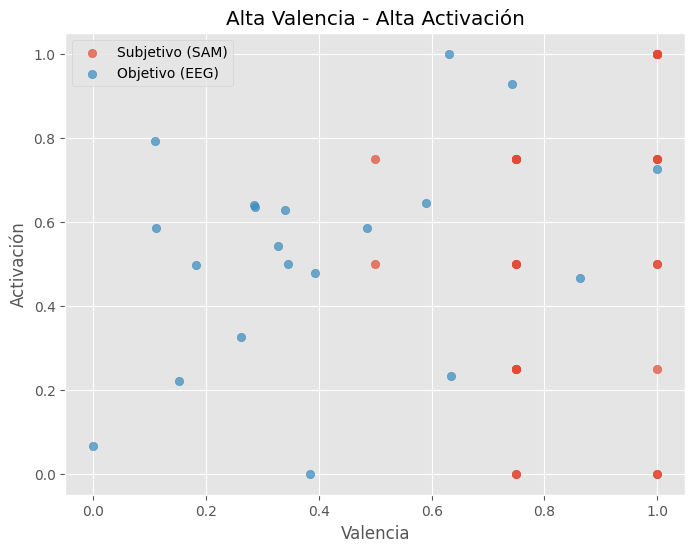

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_hh_valence'], normalized2_mk['Mk_hh_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_hvha['mean_valence'], normalized_hvha['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Alta Valencia - Alta Activación')
plt.legend()
plt.grid(True)
plt.show()

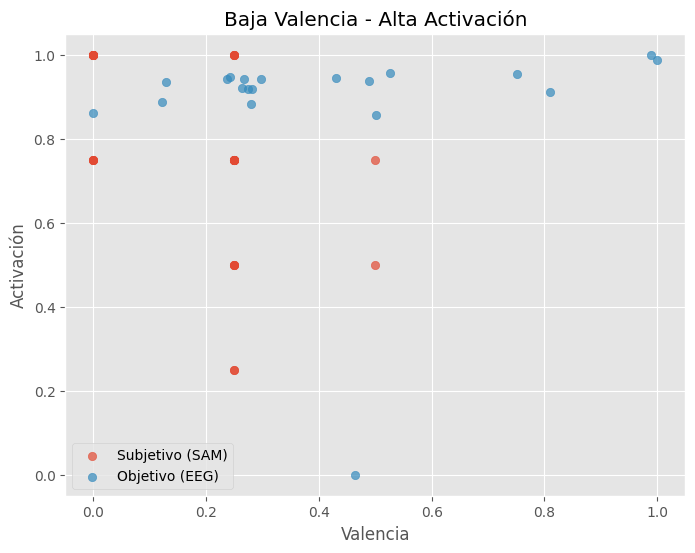

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_lh_valence'], normalized2_mk['Mk_lh_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_lvha['mean_valence'], normalized_lvha['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Baja Valencia - Alta Activación')
plt.legend()
plt.grid(True)
plt.show()

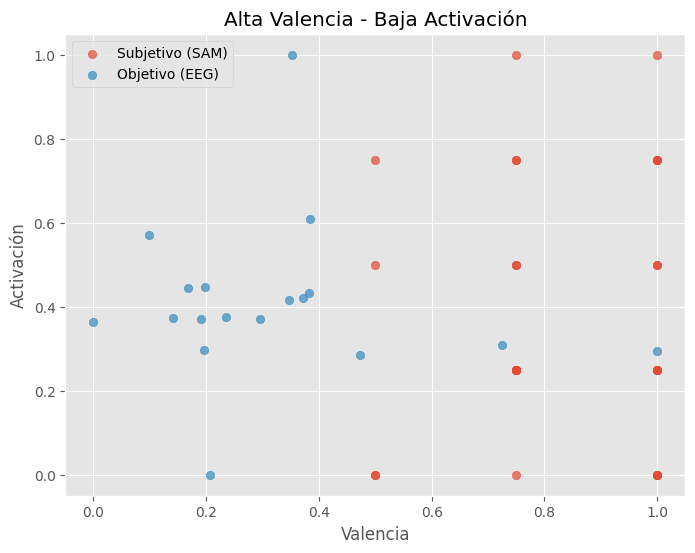

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_hl_valence'], normalized2_mk['Mk_hl_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_hvla['mean_valence'], normalized_hvla['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Alta Valencia - Baja Activación')
plt.legend()
plt.grid(True)
plt.show()

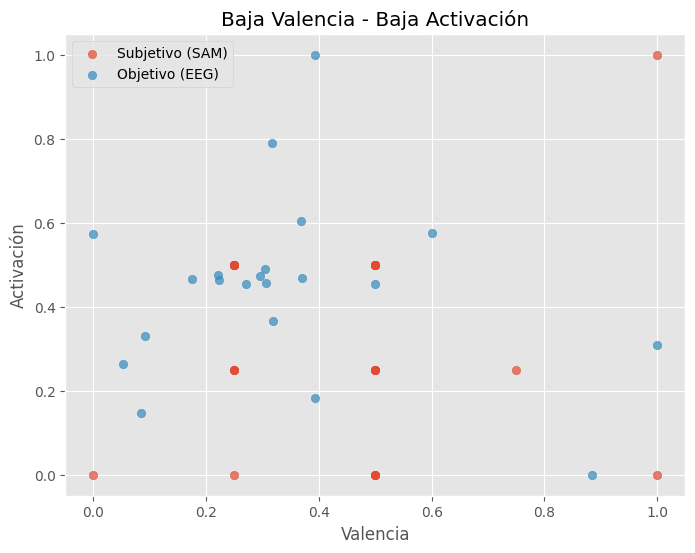

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(normalized2_mk['Mk_ll_valence'], normalized2_mk['Mk_ll_arousal'], alpha=0.7, label = 'Subjetivo (SAM)')
plt.scatter(normalized_lvla['mean_valence'], normalized_lvla['mean_arousal'], alpha=0.7, label = 'Objetivo (EEG)')
plt.xlabel('Valencia')
plt.ylabel('Activación')
plt.title('Baja Valencia - Baja Activación')
plt.legend()
plt.grid(True)
plt.show()